### Vacancy cluster formation energies
$$E_f^v = E[n-m] + mE_{atom} - E[n]$$
$$E_f^v = E[n-m]-\frac{n-m}{n}E[n]$$

In [23]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt

In [4]:
potential =  'FeH-NNIP'

1 vacancy:

In [5]:
pr = Project('vacancies')
E_f = []

In [8]:
# relax structure, get bulk energy
bulk = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic= True)
job_bulk = pr.create.job.Lammps('bulk', delete_existing_job=True)
job_bulk.structure = bulk
job_bulk.potential = potential
job_bulk.calc_minimize(pressure=0.0)
job_bulk.run(delete_existing_job=True)
eFe = job_bulk.output.energy_tot[-1]/len(bulk)
eFe

The job bulk was saved and received the ID: 10116


-8.2415477862903

In [11]:
# construct supercell, relax, get energy
sc = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic= True).repeat([4,4,4])
job = pr.create.job.Lammps('opt', delete_existing_job=True)
job.structure = sc
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)
e0 = job.output.energy_tot[-1]
supercell = job.get_structure(frame=-1)

The job opt was saved and received the ID: 10117


In [12]:
# make one vacancy by deleting one Fe atom
supercell_1 = supercell.copy()
del supercell_1[np.random.randint(1, len(supercell)+1)]

In [14]:
# calculate the energy
job_1 = pr.create_job('Lammps', 'sc_1', delete_existing_job=True)
job_1.structure = supercell_1
job_1.potential = potential
job_1.calc_minimize()
job_1.run(delete_existing_job=True)
e1 = job_1.output.energy_tot[-1]

The job sc_1 was saved and received the ID: 10118


In [15]:
# calculate formation energy
E1 = e1 - (len(supercell_1)/len(supercell))*e0
E_f.append(E1)
E1

2.212154898179506

2 vacancies

NN = nearest neighbour, for bcc:

$1NN = \frac{\sqrt{3}}{2}a$

$2NN = a $

$3NN = \sqrt{2}a$

$4NN = \frac{\sqrt{11}}{2}a$

$5NN = \sqrt{3}a$

$6NN = 2a$

In [16]:
# 1 NN
supercell_2 = supercell.copy()
del supercell_2[1]
del supercell_2[41]
# supercell_2.plot3d()

job_2 = pr.create.job.Lammps('v2', delete_existing_job=True)
job_2.structure = supercell_2
job_2.potential = potential
job_2.calc_minimize()
job_2.run(delete_existing_job=True)

e2 = job_2.output.energy_tot[-1]
E2 = e2 - len(supercell_2)/len(supercell)*e0
E_f.append(E2)
E2

The job v2 was saved and received the ID: 10119


4.203852636569081

In [17]:
# 2 NN
supercell_3 = supercell.copy()
del supercell_3[1]
del supercell_3[8]
# supercell_3.plot3d()

job_3 = pr.create.job.Lammps('v3')
job_3.structure = supercell_3
job_3.potential = potential
job_3.calc_minimize()
job_3.run(delete_existing_job=True)

e3 = job_3.output.energy_tot[-1]
E3 = e3 - len(supercell_3)/len(supercell)*e0
E_f.append(E3)
E3

The job v3 was saved and received the ID: 10120


4.213877723758969

In [18]:
# 3 NN
job_4 = pr.create.job.Lammps('v4')
supercell_4 = supercell.copy()
del supercell_4[1]
del supercell_4[10]

job_4.structure = supercell_4
job_4.potential = potential
job_4.calc_minimize()
job_4.run(delete_existing_job=True)

e4 = job_4.output.energy_tot[-1]
E4 = e4 - len(supercell_4)/len(supercell)*e0
E_f.append(E4)
E4

The job v4 was saved and received the ID: 10121


4.47324938531915

In [19]:
# 4 NN
job_5 = pr.create.job.Lammps('v5')
supercell_5 = supercell.copy()
# i = np.random.randint(len(supercell))
del supercell_5[1]
del supercell_5[49]

job_5.structure = supercell_5
job_5.potential = potential
job_5.calc_minimize()
job_5.run(delete_existing_job=True)

e5 = job_5.output.energy_tot[-1]
E5 = e5 - len(supercell_5)/len(supercell)*e0
E_f.append(E5)
E5

The job v5 was saved and received the ID: 10122


4.407007481279152

In [20]:
# 5 NN
job_6 = pr.create.job.Lammps('v6')
supercell_6 = supercell.copy()
# i = np.random.randint(len(supercell))
del supercell_6[1]
del supercell_6[42]

job_6.structure = supercell_6
job_6.potential = potential
job_6.calc_minimize()
job_6.run(delete_existing_job=True)

e6 = job_6.output.energy_tot[-1]
E6 = e6 - len(supercell_5)/len(supercell)*e0
E_f.append(E6)
E6

The job v6 was saved and received the ID: 10123


4.398490042309049

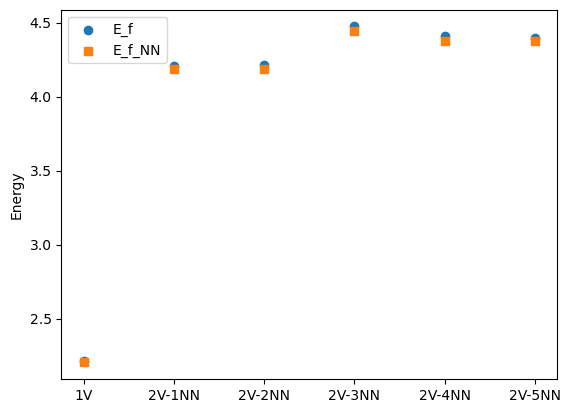

In [24]:
E_f_ref = [2.203, 4.184, 4.183, 4.445, 4.374, 4.378]

x_values = ['1V', '2V-1NN', '2V-2NN', '2V-3NN', '2V-4NN', '2V-5NN']

plt.scatter(x_values, E_f, label='E_f', marker='o')
plt.scatter(x_values, E_f_ref, label='E_f_NN', marker='s')

plt.ylabel('Energy')
plt.legend()

plt.show()

3 VACANCIES

Beeler notation (DOI: https://doi.org/10.1103/PhysRev.156.677)

In [25]:
index = {'112': [0,0,0],
         '226': [0,1,2],
         '223': [0,1,30],
         '115': [0,0,40],
         '113': [0,0,8],
         '333': [0,33,38],
        }

In [26]:
E_triv = []

for key, value in index.items():
    job = pr.create.job.Lammps(job_name=f'tri-V_{key}',delete_existing_job=True)
    supercell_x = supercell.copy()
    del supercell_x[value[0]]
    del supercell_x[value[1]]
    del supercell_x[value[2]]
    job.structure = supercell_x
    job.potential = potential
    job.calc_minimize()
    job.run(delete_existing_job=True)
    ex = job.output.energy_tot[-1]
    # Ex = ex - len(supercell_x)/len(supercell)*e0
    Ex = ex + 3*eFe - e0
    E_triv.append(Ex)
    print(Ex)

The job trimV_112 was saved and received the ID: 10124
5.904890611129076
The job trimV_226 was saved and received the ID: 10125
6.210298479649055
The job trimV_223 was saved and received the ID: 10126
6.216798904348934
The job trimV_115 was saved and received the ID: 10127
6.187563331958927
The job trimV_113 was saved and received the ID: 10128
6.228175454438997
The job trimV_333 was saved and received the ID: 10129
6.738819420158961


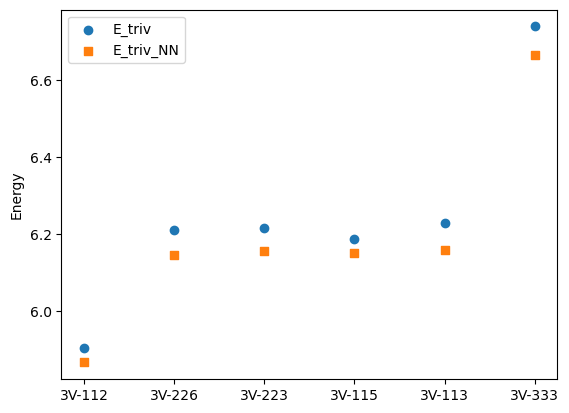

In [28]:
E_triv_ref = [5.867, 6.146, 6.155, 6.152, 6.158, 6.665]

x_values = ['3V-112', '3V-226', '3V-223', '3V-115', '3V-113', '3V-333']

plt.scatter(x_values, E_triv, label='E_triv', marker='o')
plt.scatter(x_values, E_triv_ref, label='E_triv_NN', marker='s')

plt.ylabel('Energy')
plt.legend()

plt.show()

4 vacancies

In [30]:
E_q = []

# 4 vacancies along [111] direction
supercell_qua = supercell.copy()
del supercell_qua[0]
del supercell_qua[0]
del supercell_qua[40]
del supercell_qua[40]
# supercell_qua.plot3d()

job = pr.create.job.Lammps('quadra1', delete_existing_job=True)

job.structure = supercell_qua
job.potential = potential
job.calc_minimize()
job.run(delete_existing_job=True)

eq1 = job.output.energy_tot[-1]
E = eq1 - len(supercell_qua)/len(supercell)*e0
E_q.append(E)

# 4 vacancies in tetrahedral configuration
supercell_qua = supercell.copy()
del supercell_qua[1]
del supercell_qua[7]
del supercell_qua[7]
del supercell_qua[37]
# supercell_qua.plot3d()

job = pr.create.job.Lammps('quadra2', delete_existing_job=True)

job.structure = supercell_qua
job.potential = potential
job.calc_minimize()
job.run(delete_existing_job=True)

eq2 = job.output.energy_tot[-1]
E = eq2 - len(supercell_qua)/len(supercell)*e0
E_q.append(E)


The job quadra1 was saved and received the ID: 10130
The job quadra2 was saved and received the ID: 10131


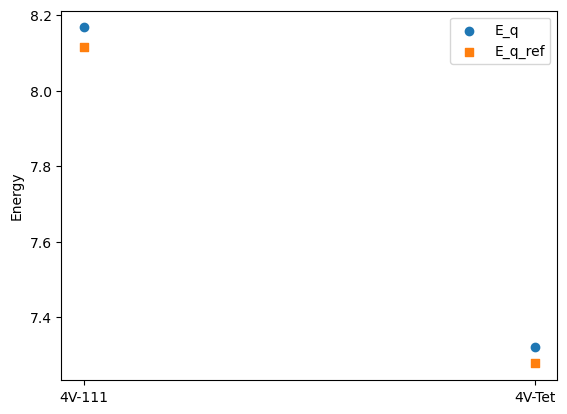

In [31]:
E_q_ref = [8.114, 7.278]

x_values = ['4V-111', '4V-Tet']

plt.scatter(x_values, E_q, label='E_q', marker='o')
plt.scatter(x_values, E_q_ref, label='E_q_ref', marker='s')

plt.ylabel('Energy')
plt.legend()

plt.show()